<a href="https://colab.research.google.com/github/dheaadventina/Hands-On-3-Pertemuan-Minggu-Ke-4_Dhea-Adventina-Sandy/blob/main/Hands_On_3_Analisis%20Regresi_Pertemuan_Minggu_Ke_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas 1
Buat analisis korelasi lengkap. Muat dataset eksternal (misalnya, .csv) dengan beberapa variabel, pilih beberapa pasang variabel yang relevan, hitung koefisien korelasi Pearson untuk pasangan tersebut. Visualisasikan korelasi dengan scatterplot informatif (misalnya, dengan garis regresi). Lakukan uji hipotesis korelasi untuk korelasi terkuat dan berikan interpretasi mendalam mengenai jenis, kekuatan, signifikansi, implikasi praktis, serta batasan (termasuk korelasi vs. kausalitas) dari hasil analisis.

In [26]:
# --- Import Library ---
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- Upload dan Baca File ---
uploaded = files.upload()

#1. Baca Dataset dari file Excel
data1 = pd.read_csv("Data_Tanaman_Padi_Sumatera_version_1.csv", delimiter=';')
data1.head()

Saving Data_Tanaman_Padi_Sumatera_version_1.csv to Data_Tanaman_Padi_Sumatera_version_1 (1).csv


,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,132953600,32358900,162700,8200,2606
1,Aceh,1994,129969900,32904100,152100,8212,2692
2,Aceh,1995,138290500,33925300,147600,8272,2627
3,Aceh,1996,141912800,34822300,155700,8300,2608
4,Aceh,1997,136807400,33756100,133900,8246,2631


In [27]:
#2. Pilih pasangan variabel
pasangan_variabel = [
    ("Tahun", "Produksi"),
    ("Tahun", "Luas Panen"),
    ("Tahun", "Suhu rata-rata")
]

hasil_korelasi = {}

#3. Hitung Korelasi Pearson untuk setiap pasangan
for x, y in pasangan_variabel:
    variabel_x = data1[x]
    variabel_y = data1[y]

    korelasi_pearson, p_value = pearsonr(variabel_x, variabel_y)
    hasil_korelasi[(x, y)] = (korelasi_pearson, p_value)

    print(f"\nKorelasi Pearson antara {x} dan {y}: {korelasi_pearson:.3f}")

    # --- Interpretasi kekuatan korelasi ---
    if korelasi_pearson > 0.8:
        interpretasi = "Korelasi sangat kuat positif"
    elif korelasi_pearson > 0.6:
        interpretasi = "Korelasi kuat positif"
    elif korelasi_pearson > 0.4:
        interpretasi = "Korelasi sedang positif"
    elif korelasi_pearson > 0.2:
        interpretasi = "Korelasi lemah positif"
    elif korelasi_pearson > 0:
        interpretasi = "Korelasi sangat lemah positif"
    elif korelasi_pearson < -0.8:
        interpretasi = "Korelasi sangat kuat negatif"
    elif korelasi_pearson < -0.6:
        interpretasi = "Korelasi kuat negatif"
    elif korelasi_pearson < -0.4:
        interpretasi = "Korelasi sedang negatif"
    elif korelasi_pearson < -0.2:
        interpretasi = "Korelasi lemah negatif"
    elif korelasi_pearson < 0:
        interpretasi = "Korelasi sangat lemah negatif"
    else:
        interpretasi = "Tidak ada korelasi linier"

    print("Interpretasi:", interpretasi)

#4. Tentukan Korelasi Terkuat
korelasi_terkuat = max(hasil_korelasi.items(), key=lambda item: abs(item[1][0]))
(x_kuat, y_kuat), (r_kuat, p_kuat) = korelasi_terkuat

#5. Jenis Korelasi
if r_kuat > 0:
    jenis_korelasi = "Korelasi Positif"
    interpretasi_jenis = f"Artinya ketika nilai {x_kuat} meningkat, maka nilai {y_kuat} cenderung meningkat"
elif r_kuat < 0:
    jenis_korelasi = "Korelasi Negatif"
    interpretasi_jenis = f"Artinya ketika nilai {x_kuat} meningkat, maka nilai {y_kuat} akan menurun"
else:
    jenis_korelasi = "Korelasi Nol"
    interpretasi_jenis = f"Tidak ada korelasi linier antara {x_kuat} dan {y_kuat}"

print("\n=== KORELASI TERKUAT ===")
print(f"Variabel: {x_kuat} dan {y_kuat}")
print(f"Nilai r: {r_kuat:.3f}")
print(f"P-value: {p_kuat:.5f}")
print(f"Jenis korelasi: {jenis_korelasi}")
print(interpretasi_jenis)



Korelasi Pearson antara Tahun dan Produksi: 0.183
Interpretasi: Korelasi sangat lemah positif

Korelasi Pearson antara Tahun dan Luas Panen: -0.046
Interpretasi: Korelasi sangat lemah negatif

Korelasi Pearson antara Tahun dan Suhu rata-rata: 0.005
Interpretasi: Korelasi sangat lemah positif

=== KORELASI TERKUAT ===
Variabel: Tahun dan Produksi
Nilai r: 0.183
P-value: 0.00615
Jenis korelasi: Korelasi Positif
Artinya ketika nilai Tahun meningkat, maka nilai Produksi cenderung meningkat


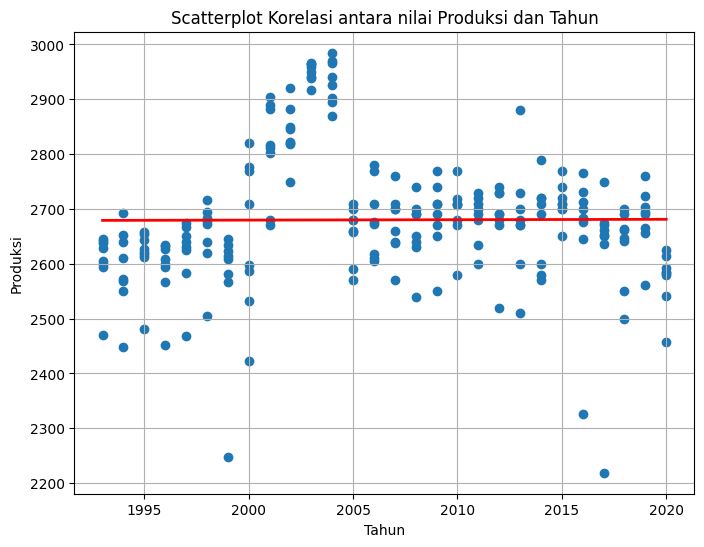

In [29]:
# Buat scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(variabel_x, variabel_y)

# Tambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Produksi')

m, b = np.polyfit(variabel_x, variabel_y, 1)
plt.plot(variabel_x, m*variabel_x + b, color='red', linewidth=2)

plt.title('Scatterplot Korelasi antara nilai Produksi dan Tahun')
plt.grid(True)
# Tampilkan plot
plt.show()

In [30]:
# Tetapkan tingkat signifikansi (alpha)
alpha = 0.05
print(f"Koefisien Korelasi Pearson: {korelasi_pearson:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Tingkat Signifikansi (alpha): {alpha}")

# Lakukan uji hipotesis
if p_value < alpha:
  keputusan = "Tolak Hipotesis Nol (H0)"
  interpretasi_uji = "Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Tahun dan nilai Prduksi."
else:
  keputusan = "Gagal Menolak Hipotesis Nol (H0)"
  interpretasi_uji = "Tidak ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Tahun dan nilai Prduksi dalam populasi."

print(f"\nKeputusan: {keputusan}")
print(f"Interpretasi Uji: {interpretasi_uji}")

Koefisien Korelasi Pearson: 0.005
P-value: 0.942
Tingkat Signifikansi (alpha): 0.05

Keputusan: Gagal Menolak Hipotesis Nol (H0)
Interpretasi Uji: Tidak ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Tahun dan nilai Prduksi dalam populasi.


#Tugas 2
Lakukan analisis korelasi lengkap dengan memuat dataset eksternal, memilih variabel, menghitung koefisien korelasi Pearson, memvisualisasikan dengan scatterplot dan garis regresi, melakukan uji hipotesis, dan memberikan interpretasi mendalam.

In [62]:
# --- Upload dan Baca File ---
uploaded = files.upload()

# --- 1. Baca Dataset dari file Excel yang kamu unggah ---
data1 = pd.read_csv("weight_change_dataset.csv", delimiter=';', decimal=',')
variabel_x = data1["Daily Calories Consumed"]
variabel_y = data1["Final Weight (lbs)"]

data1.head()

Saving weight_change_dataset.csv to weight_change_dataset (13).csv


,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,2284,31023,39160,8137,2.0,1,Sedentary,Excellent,6,2286
1,2,46,F,1654,22755,38230,15475,24.0,6,Very Active,Excellent,6,1678
2,3,32,F,1428,21194,27854,6660,14.0,7,Sedentary,Good,3,1442
3,4,25,F,1455,21813,25873,4060,8.0,8,Sedentary,Fair,2,1463
4,5,38,M,1555,24638,33128,8490,20.0,10,Lightly Active,Good,1,1575


In [63]:
    #Menghitung Koefisien Korelasi Pearson
    korelasi_pearson, p_value = pearsonr(variabel_x, variabel_y)
    hasil_korelasi[(x, y)] = (korelasi_pearson, p_value)

    print(f"\nKorelasi Pearson antara {x} dan {y}: {korelasi_pearson:.3f}")

    # --- Interpretasi kekuatan korelasi ---
    if korelasi_pearson > 0.8:
        interpretasi = "Korelasi sangat kuat positif"
    elif korelasi_pearson > 0.6:
        interpretasi = "Korelasi kuat positif"
    elif korelasi_pearson > 0.4:
        interpretasi = "Korelasi sedang positif"
    elif korelasi_pearson > 0.2:
        interpretasi = "Korelasi lemah positif"
    elif korelasi_pearson > 0:
        interpretasi = "Korelasi sangat lemah positif"
    elif korelasi_pearson < -0.8:
        interpretasi = "Korelasi sangat kuat negatif"
    elif korelasi_pearson < -0.6:
        interpretasi = "Korelasi kuat negatif"
    elif korelasi_pearson < -0.4:
        interpretasi = "Korelasi sedang negatif"
    elif korelasi_pearson < -0.2:
        interpretasi = "Korelasi lemah negatif"
    elif korelasi_pearson < 0:
        interpretasi = "Korelasi sangat lemah negatif"
    else:
        interpretasi = "Tidak ada korelasi linier"

    print("Interpretasi:", interpretasi)


Korelasi Pearson antara Tahun dan Suhu rata-rata: 0.592
Interpretasi: Korelasi sedang positif


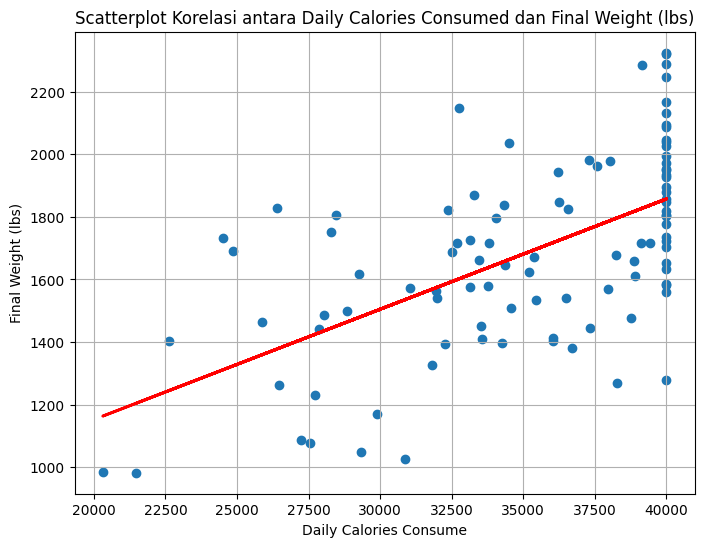

In [64]:
# Buat scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(variabel_x, variabel_y)

# Tambahkan label dan judul
plt.xlabel('Daily Calories Consume')
plt.ylabel('Final Weight (lbs)')

m, b = np.polyfit(variabel_x, variabel_y, 1)
plt.plot(variabel_x, m*variabel_x + b, color='red', linewidth=2)

plt.title('Scatterplot Korelasi antara Daily Calories Consumed dan Final Weight (lbs)')
plt.grid(True)
# Tampilkan plot
plt.show()

In [66]:
# Tetapkan tingkat signifikansi (alpha)
alpha = 0.05
print(f"Koefisien Korelasi Pearson: {korelasi_pearson:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Tingkat Signifikansi (alpha): {alpha}")

# Lakukan uji hipotesis
if p_value < alpha:
  keputusan = "Tolak Hipotesis Nol (H0)"
  interpretasi_uji = "Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Daily Calories Consumed dan Final Weight (lbs) dalam populasi."
else:
  keputusan = "Gagal Menolak Hipotesis Nol (H0)"
  interpretasi_uji = "Tidak ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Daily Calories Consumed dan Final Weight (lbs) dalam populasi."

print(f"\nKeputusan: {keputusan}")
print(f"Interpretasi Uji: {interpretasi_uji}")

Koefisien Korelasi Pearson: 0.592
P-value: 0.000
Tingkat Signifikansi (alpha): 0.05

Keputusan: Tolak Hipotesis Nol (H0)
Interpretasi Uji: Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Daily Calories Consumed dan Final Weight (lbs) dalam populasi.
